In [20]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from numpy import array, pi

# Polytropes

In the lecture, you considered polytropic stars where the pressure in the stellar interior is only a function of density,
\begin{align}
P = K \rho^\gamma = K \rho^{1+\frac{1}{n}},
\label{eq:polytrope}
\end{align} 
where $n$ is the polytropic index. Writing the density as $\rho(r) = \rho_\mathrm{c} \theta^n(r)$ such that $P(r) = K \rho_\mathrm{c}^{1+\frac{1}{n}} \theta^{1+n}(r) = P_\mathrm{c} \theta^{1+n}(r)$ for $0\leq\theta\leq1$, and the radius as $r=r_n\xi$ with $r_n^2 = \frac{(n+1)K}{4\pi G\rho_\mathrm{c}^{(n-1)/n}} = \frac{(n+1)P_\mathrm{c}}{4\pi G\rho_\mathrm{c}^2}$, led to the Lane-Emden equation,
\begin{align}
\frac{1}{\xi^2}\frac{\mathrm{d}}{\mathrm{d}\xi}\left(\xi^2\frac{\mathrm{d}\theta}{\mathrm{d}\xi}\right) = -\theta^n,
\label{eq:lane-emden}
\end{align}
of a polytropic star that is in hydrostatic equilibrium. 

In the core ($r=0$, i.e. $\xi=0$), we have $\theta=1$ such that $\rho_\mathrm{c}$ is indeed the central density and $\mathrm{d}\theta/\mathrm{d}\xi=0$ because $\mathrm{d}P/\mathrm{d}r=0$ for $r=0$ (cf. hydrostatic equilibrium).

At the surface ($r=R$), we require $\rho=P=0$, i.e. $\theta=0$. In fact, the general solution of $\theta$ may cross zero several times (it may oscillate around zero) and we denote the surface as that point $\xi_1$ where $\theta$ has its first zero point to avoid zero densities inside the star. The radius of such a star is then $R=r_n \xi_1$.

#### Problem 1:
For an ideal gas, $P=\frac{k_\mathrm{B}}{\mu m_\mathrm{u}}\rho T$, what physical quantity does $\theta$ describe? *Hint:* From the above definitions, you can easily see that $\theta^n$ is directly proportional to the density $\rho$ and $\theta^{1+n}$ is proportional to pressure $P$...

# Your solutions here
$\theta$ describes the temperature of the star

We now solve the Lane-Emden equation to obtain, e.g., the interior structure of a simple (polytropic) star. In the lecture, we introduced $x=\xi$, $y=\theta$ and $z=\frac{\mathrm{d}\theta}{\mathrm{d}\xi}$ to rewrite the second-order Lane-Emden differential equation into a set of two first-order differential equations,
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}x} &= z, \\
\frac{\mathrm{d}z}{\mathrm{d}x} &= -\frac{2}{x}z - y^n.
\end{align}
We will solve these equations via a simple shooting method that numerically integrates the equations from the centre to the surface. To this end, we discretise $x$, i.e. the radius, in small steps of length $h$. We start at some $x_0$ at which we also need $y_0$ and $z_0$ (see Problem 2). For a simple Euler step of stepsize $h$, simple integration of the two differential equations yields
\begin{align}
x_1 &\rightarrow x_0 + h, \\
y_1 &\rightarrow y_0 + z_0 h, \\
z_1 &\rightarrow z_0 + \left(-\frac{2}{x_0}z_0-y_0^n\right)h. \\
\end{align}
We then continue to obtain $x_2$, $y_2$ and $z_2$ from $x_1$, $y_1$ and $z_1$, and so on until we reach the surface of the star. Such a Euler method is only accurate to first order, but we could simply use higher-order, i.e. more accurate, integrators such as the Runge-Kutta method. In our case, the simple Euler method will suffice for small enough stepsizes $h$.

#### Problem 2:
(a) What are the conditions $x_0$, $y_0$ and $z_0$ in the core of the star, and what is the stopping condition at the surface? 

(b) The core of the star is at $x=0$, but the second differential equation has a singularity at $x=0$. How can we avoid this singularity in the numerical integration? *Hint:* The proper solution would be to make a Taylor expansion of the equations about the origin but a much simpler albeit less accurate trick will do here... 

# Your answer here
(a) $x_0$=0,$y_0$ =1, $z_0=0$ 


(b) we want to stop at y=1 


(c) The stopping condition for x should be 1e-7 , while y>0



#### Problem 3:
(a) Now, write a function that integrates the Lane-Emden equation for a polytrope of index $n$ out to a maximum $x$ of $x_\mathrm{max}=20$ with stepsize $h=10^{-3}$. The function should accept the polytropic index $n$, the stepsize $h$ and the maximum $x_\mathrm{max}$ as arguments and return lists of $x$, $y$ and $z$.

(b) Extend your function by a linear interpolation to also return the surface values of $x$, $y$ and $z$. 

In [2]:
def polytrope(n, h=1e-3, x_max=20.0):
    xi = 1e-7
    yi = 1
    zi = 0
    
    x = []
    y = []
    z = []
    
    while yi>=0 and xi<=x_max:
        # compute Euler step for next point
        #
        # Your integration goes here!
        #
        xj = xi+h
        yj = yi+(zi*h)
        zj = zi+((-2*zi/xi)-yi**n)*h
        
        # add point to output array
        x.append(xj)
        y.append(yj)
        z.append(zj)
        
        # set new points to old points for next step
        xi = xj
        yi = yj
        zi = zj
        
        # get surface properties(linear interpolation)
        ysurf = 0.0
        xsurf = x[-1]
        zsurf = z[-1]
        
    return (np.array(x), np.array(y), np.array(z),xsurf,ysurf,zsurf)

In [3]:
#polytrope(3, h=1e-3, x_max=20.0)

## Density profile of polytropes

#### Problem 4:
Solve the Lane-Emden equation for polytropic indices of $n=1.5$ and $n=3.0$ using your function from above and plot the relative density $\rho/\rho_\mathrm{c}=\theta^n$ against the relative radius $r/R=\xi/\xi_1$. Which polytrope is centrally more condensed? Do not forget to add labels to your axes.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


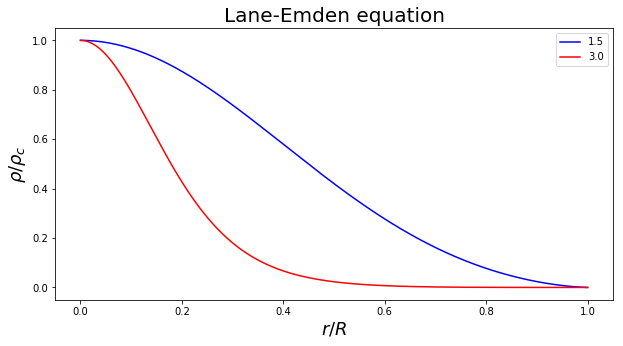

In [4]:
# Your solution here
#theta^n on y and x on x
x_15,y_15,z_15,xs_15,ys_15,zs_15 = polytrope(1.5)
x_30,y_30,z_30,xs_30,ys_30,zs_30 = polytrope(3.0)



plt.figure(figsize=(10,5))
plt.plot(x_15/xs_15, np.power(y_15,1.5),label=1.5,c='blue')
plt.plot(x_30/xs_30, np.power(y_30,3.0),label=3.0,c='red')
plt.title('Lane-Emden equation',fontsize=20)
plt.ylabel(r'$\rho/\rho_c$',fontsize=18)
plt.xlabel('$r/R$',fontsize=18)
plt.legend()
plt.savefig('plot1.pdf')
plt.show()

## Tabulated polytropic constants

In the lecture, we derived further useful quantities that we briefly summarise here for your convenience. For example, the total mass of a polytropic star is
\begin{align}
M = 4\pi r_n^3 \rho_\mathrm{c} M_n
\end{align}
with
\begin{align}
M_n = -\xi_1^2 \left. \frac{\mathrm{d}\theta}{\mathrm{d}\xi}\right\vert_{\xi=\xi_1}.
\end{align}
The central density is then related to the mean density,
\begin{align}
\rho_\mathrm{c} = D_n \frac{M}{4\pi/3R^3} = D_n \bar{\rho}
\end{align}
with
\begin{align}
D_n = -\left[\frac{3}{\xi_1} \left. \frac{\mathrm{d}\theta}{\mathrm{d}\xi}\right\vert_{\xi=\xi_1} \right]^{-1}.
\end{align}
The radius is $R=r_n \xi_1=r_n R_n$, i.e.
\begin{align}
R_n = \xi_1.
\end{align}
We also arrived at a mass-radius relation,
\begin{align}
\frac{R}{R_\mathrm{n}} = \left(\frac{1}{4\pi}\right)^{\frac{1}{3-n}} \left(\frac{(n+1)K}{G}\right)^{\frac{n}{3-n}} \left(\frac{M_\mathrm{n}}{M}\right)^{\frac{n-1}{3-n}},
\end{align}
which we used to show that the central pressure of a star can be written as
\begin{align}
P_\mathrm{c} = B_n \left(\frac{4\pi}{3}\right)^{1/3} G M^{2/3} \rho_\mathrm{c}^{4/3},
\end{align}
where
\begin{align}
B_n = \frac{3^{1/n}}{n+1} M_n^{\frac{1-n}{n}} R_n^{\frac{n-3}{n}} D_n^{\frac{3-n}{3n}}.
\end{align}
The equation that relates the central pressure and the density of stars of different mass is particularly remarkable, because one can understand almost all of stellar evolution from this equation alone. In fact, you can derive this equation more easily from homology or the equation of hydrostatic equilibrium. Later in the course, you will understand better why this equation is so important for our understanding of stellar evolution.

#### Student-report part 1:
Solve the Lane-Emden equation for $n=1.0$, $1.5$, $2.0$, $2.5$, $3.0$ and $3.5$, compute the dimensionless parameters $D_n$, $M_n$, $R_n$ and $B_n$ (see summary above) and put them in a table in your report. What is the value of $M_3$?

In [4]:
# polytopic indices
ns=np.arange(1.0, 4.0, 0.5)
ns.any()
nt = np.array([1.0,1.5,2.0,2.5,3.0,3.5])
# Your solution here

def polx(n, h=1e-3, x_max=20.0):
    xi = 1e-7
    yi = 1
    zi = 0
    
    x = []
    y = []
    z = []
    
    while yi>=0 and xi<=x_max:
        # compute Euler step for next point
        #np.logical_and(x > -2, x < 2)
        # Your integration goes here!
        #
        xj = xi+h
        yj = yi+(zi*h)
        zj = zi+((-2*zi/xi)-yi**n)*h
        
        # add point to output array
        x.append(xj)
        y.append(yj)
        z.append(zj)
        
        # set new points to old points for next step
        xi = xj
        yi = yj
        zi = zj
        
        # get surface properties(linear interpolation)
        ysurf = 0.0
        xsurf = x[-1]
        zsurf = z[-1]
        
    return (xsurf)
    
    
    

def polz(n, h=1e-3, x_max=20.0):
    xi = 1e-7
    yi = 1
    zi = 0
    
    x = []
    y = []
    z = []
    while yi>=0 and xi<=x_max:
        # compute Euler step for next point
        #
        # Your integration goes here!
        #
        xj = xi+h
        yj = yi+(zi*h)
        zj = zi+((-2*zi/xi)-yi**n)*h
        
        # add point to output array
        x.append(xj)
        y.append(yj)
        z.append(zj)
        
        # set new points to old points for next step
        xi = xj
        yi = yj
        zi = zj
        
        # get surface properties(linear interpolation)
        ysurf = 0.0
        xsurf = x[-1]
        zsurf = z[-1]
        
    return (zsurf)


In [19]:
### Define polytropic quantities Dn, Mn, 

def Dn(n,polx,polz):
    dn= -((3/polx(n))*polz(n))**(-1)
    return dn
D1,D15,D2,D25,D3,D35= Dn(1.0,polx,polz),Dn(1.5,polx,polz),Dn(2,polx,polz),Dn(2.5,polx,polz),Dn(3,polx,polz),Dn(3.5,polx,polz)
D=array([D1,D15,D2,D25,D3,D35])

#########

def Mn(n,polx,polz):
    mn= -(polx(n)**2)*polz(n)
    return mn

M1,M15,M2,M25,M3,M35= Mn(1.0,polx,polz),Mn(1.5,polx,polz),Mn(2,polx,polz),Mn(2.5,polx,polz),Mn(3,polx,polz),Mn(3.5,polx,polz)
M=array([M1,M15,M2,M25,M3,M35])

##########

R1,R15,R2,R25,R3,R35 = polx(1.0),polx(1.5),polx(2.0),polx(2.5),polx(3.0),polx(3.5)
R = array([R1,R15,R2,R25,R3,R35])

#########

def Bn(n,mn,rn,dn):
    bn = 3**(1/n)/(n+1)*mn**(1-n/n)*rn**(n-3/n)*dn**((3-n)*3*n)
    return bn
N = array([1.0,1.5,2.0,2.5,3.0,3.5])
B = Bn(N,M,R,D)
print('n=', N)
print('Dn=', D)
print('Mn=', M)
print('Rn=', R)
print('Bn=', B)


n= [1.  1.5 2.  2.5 3.  3.5]
Dn= [  3.29005676   5.98674574  11.39802542  23.39966913  54.1722198
 152.96382204]
Mn= [3.14263496 2.71416961 2.41054817 2.1862718  2.01699557 1.88908772]
Rn= [3.1420001 3.6530001 4.3520001 5.3540001 6.8950001 9.5350001]
Bn= [1.92707766e+02 7.67103530e+04 2.64095833e+06 5.35301896e+05
 1.71415062e+01 4.00149006e-10]


White dwarfs are a special type of stars in which gravity is balanced by the quantum-mechanical degeneracy pressure of electrons (Pauli principle). Such objects are the end products of some stars including our Sun.

Later in the lecture, we will show that a fully degenerate electron gas produces a pressure 
\begin{align}
P_\mathrm{e} = \frac{h^2}{20 m_\mathrm{e}} \left(\frac{3}{\pi}\right)^{2/3} \frac{1}{m_\mathrm{H}^{5/3}} \left(\frac{\rho}{\mu_\mathrm{e}}\right)^{5/3},
\end{align}
where $\mu_\mathrm{e}$ is the mean molecular weight per free electron, which is $\mu_\mathrm{e}=2.0$ for a star made of only helium, carbon, oxygen etc. and is $\mu_\mathrm{e}=2.15$ for a pure iron gas. In terms of the atomic mass unit $m_\mathrm{u}$, the hydrogen atom has a mass of $m_\mathrm{H}\approx 1.00784 m_\mathrm{u}$.

If the electrons are fully relativistic, the degeneracy pressure takes the form
\begin{align}
P_\mathrm{e,r} = \frac{h c}{8} \left(\frac{3}{\pi}\right)^{1/3} \frac{1}{m_\mathrm{H}^{4/3}} \left(\frac{\rho}{\mu_\mathrm{e}}\right)^{4/3}.
\end{align}
This implies that white dwarfs are well described by a polytrope of index $n=1.5$ ($\gamma=1+\frac{1}{n}=5/3$) and, if the electrons are fully relativistic, by a polytrope of index $n=3.0$ ($\gamma=4/3$).

# Mass-radius relation of white dwarfs

#### Student-report part 2:
Use the tabulated values of $R_n$ and $M_n$ of a $n=1.5$ polytrope and the constant $K$ from electron degeneracy pressure to plot the mass-radius relation of white dwarfs for masses $0.01\text{--}2.0\,\mathrm{M}_\odot$. Has a more massive white dwarf a smaller or a larger radius than a less massive white dwarf? 

*Hint:* The Python package `scipy.constants` has many natural [constants](https://docs.scipy.org/doc/scipy/reference/constants.html) in SI units. However, it does not provide commonly-used astronomical constants. For example, loading the module via `import scipy.constants as const`, you can access Planck's constant via `const.h`.

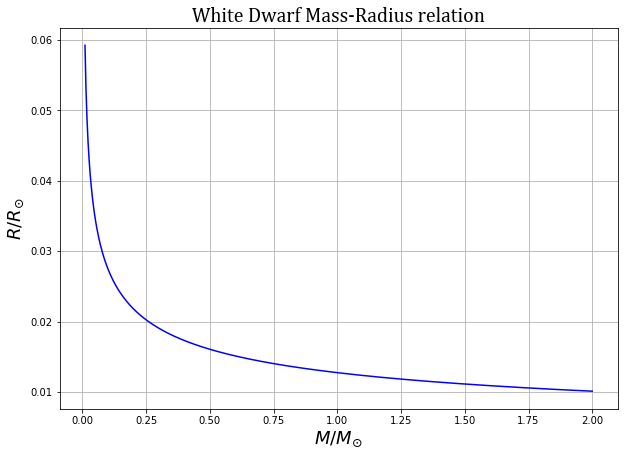

In [75]:
import scipy.constants as const

M_sun = 1.98847542e30 # in kg
R_sun = 695700000.0 # in m

Mwd = np.linspace(0.01, 2.0, 1000) # a useful range of WD masses

mu = 1.6605390666e-27 #in kg
Rwd = R15*((1/(4*pi))**(1/(1.5)))*(2.5/const.G)*(M15/(Mwd*M_sun))**(0.5/1.5)/R_sun

# Your solution here
bsfont = {'fontname':'Cambria Math'}
plt.figure(figsize=(10,7))
plt.plot(Mwd,Rwd,c='blue')
plt.xlabel(r'$M/M_{\odot}$',fontsize=18,**bsfont)
plt.ylabel(r'$R/R_{\odot}$',fontsize=18,**bsfont)
plt.title('White Dwarf Mass-Radius relation',fontsize=20,**bsfont)
plt.grid()

Question: More massive white dwarf has smaller radius 

This mass-radius relation is not completely accurate because, for higher masses, there will be some contribution from relativistic degenerate electrons such that the white dwarfs cannot be solely described as a $n=1.5$ polytrope anymore.

For example, on [Wikipedia](https://en.wikipedia.org/wiki/White_dwarf) there is a more complete graph:
<img src="ChandrasekharLimitGraph.svg" alt="WD mass-radius relation" width="500"/>

# Chandrasekhar mass

The mean density of white dwarfs described by a $n=1.5$ polytrope increases as $\bar{\rho}\propto M^2$ (why?). For increasing mass $M$, the mean density increases and electrons become relativistic (why?).

A fully relativistic, degenerate electron gas is well described by a $n=3.0$ polytrope. As we have seen in the lecture, there is only one mass $M$ for which such a star can be in hydrostatic equilibrium. This mass is called the Chandrasekhar mass. If a white dwarf exceeds this limit, it will collapse and produce a Type Ia supernova. We will hear more about these stars later in the lecture.

#### Student-report part 3:
Use the tabulated value $M_3$ and the polytropic constant $K$ from above to show that the Chandrasekhar mass is $M_\mathrm{Ch}\approx5.83\,\mu_\mathrm{e}^{-2}\,\mathrm{M}_\odot$. Compute the Chandrasekhar mass for a white dwarf made of carbon and oxygen, and of a white dwarf made of iron. The latter mass limit is relevant for core-collapse supernovae as we will see later in this course. For which composition do we have $\mu_\mathrm{e}=1.0$ and hence a Chandrasekhar mass of $5.83\,\mathrm{M}_\odot$?

Solution: 

(a) for a degenerate non-relativistic electron gas, $R \propto M^{-1/3}$. Combining it with $\rho \propto MR^{-3}$ we obtain $\bar \rho \propto M^2$

(b) The mean density increases and electrons become relativistic due to Pauli exclusion principle (electrons are pushed to higher momenta)

(c) For n=3, the mass-radius relation becomes:

 $M = 4\pi M_{3}\left(\frac{K}{\pi G}\right)^{3/2}$
 
 plugging in $M_{3}=2.0170$ 
 
(d) the general equation for $\mu_e$ is:

\begin{equation}
    \mu_e = \left(\sum_{i}\frac{X_i Z_i}{A_i}\right)^{-1}
\end{equation}

where A is the molecular weight and Z is the charge. For Hydrogen, $\mu_e = 1$, for Oxygen, Helium, and Carbon $\mu_e = 2$, and for iron $\mu_e = 56/26$

The resulting Chandrasekhar masses $M_\mathrm{Ch}$ are:

(e) $\mu_e = 1$ is valid for Hydrogen composition since $A/Z=1$

For this and other seminal contributions to the theory of stars, Subrahmanyan Chandrasekhar received a Nobel Prize in Physics in 1983. By the way: he did much of this work on a boat trip from India to the UK. 

In [78]:
def Chandra(me):
    m = 5.83*me**(-2)
    return m
print ('chandra O', Mch(2))
print ('chandra F', Mch(56/26))

chandra O 1.4575
chandra F 1.2567219387755104
